<a href="https://colab.research.google.com/github/mgw54/Colab_Clones/blob/main/20250222_DNA_AEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown   #**Upload the Data**
from google.colab import files
import numpy as np
import pandas as pd
from tkinter import Tk     # from tkinter import Tk for Python 3.x
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt
import os
import time

#@markdown  - provide a name this job
jobname1 = '20250222_DNA_AEC_1' #@param {type:"string"}
uploaded1 = files.upload()
filename1 = next(iter(uploaded1))
df = pd.read_csv((filename1), encoding = "utf_16_le", sep= '\t', index_col=False)
rows1 = len(df.index)


Saving mgw54_20250222_MonoQ_AEC_Na2 001.csv to mgw54_20250222_MonoQ_AEC_Na2 001.csv


<ipython-input-49-ad9cd21443f0>:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv((filename1), encoding = "utf_16_le", sep= '\t', index_col=False)


In [ ]:
#print(df.head(10))
vols280df = df.tail(-3)["Chrom.1"].astype(float) # Convert to numeric type if necessary
A280df = df.tail(-3)["Unnamed: 1"].astype(float) # Convert to numeric type if necessary
vols260df = df.tail(-3)["Chrom.1.7"].astype(float) # Convert to numeric type if necessary
A260df = df.tail(-3)["Unnamed: 15"].astype(float) # Convert to numeric type if necessary
volpbdf = df.tail(-3)["Chrom.1.2"].astype(float) # Convert to numeric type if necessary
pbdf = df.tail(-3)["Unnamed: 5"].astype(float) # Convert to numeric type if necessary
print(A260df)

3       -0.895438
4        0.030990
5        0.046323
6        0.059113
7        0.069677
           ...   
51865         NaN
51866         NaN
51867         NaN
51868         NaN
51869         NaN
Name: Unnamed: 15, Length: 51867, dtype: float64


In [ ]:
# Setting up the font to be the latex font beacuse I'm a sad bastard
import matplotlib as mpl
mpl.rcParams['font.family']='serif'
mpl.rcParams['mathtext.fontset']='cm'
import matplotlib.pyplot as plt

<ipython-input-54-c78a98abf207>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 4)  # Create a colormap with enough colors


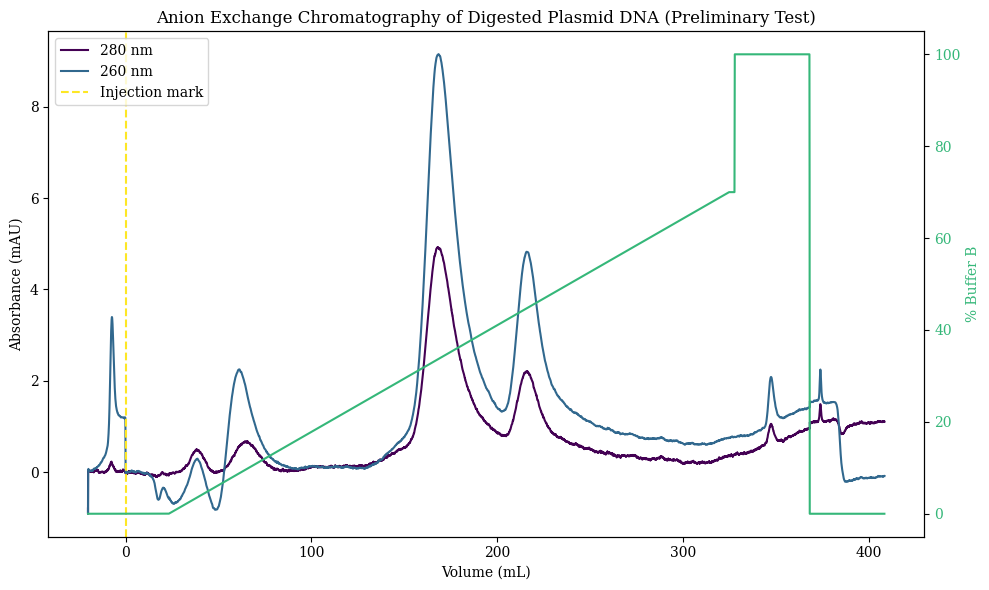

In [ ]:
# prompt: create a plot where three dataframes are plotted against their respective x axis dataframes

import matplotlib.cm as cm

viridis = cm.get_cmap('viridis', 4)  # Create a colormap with enough colors

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Volume (mL)')
ax1.set_ylabel('Absorbance (mAU)', color='black')
ax1.plot(vols280df, A280df, color=viridis(0), label='280 nm')
ax1.legend(loc='upper left')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Anion Exchange Chromatography of Digested Plasmid DNA (Preliminary Test)')

ax1.plot(vols260df, A260df, color=viridis(1), label='260 nm')
plt.axvline(x=0, color=viridis(3), linestyle='--', label='Injection mark')
ax1.legend(loc='upper left')


ax2 = ax1.twinx()  # instantiate a third axes that shares the same x-axis
#ax2.spines['right'].set_position(('outward', 60))

color = 'tab:orange'
ax2.set_ylabel('% Buffer B', color=viridis(2))  # we already handled the x-label with ax1
ax2.plot(volpbdf, pbdf, color=viridis(2))
ax2.tick_params(axis='y', labelcolor=viridis(2))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
